In [282]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [283]:
digits = load_digits()

# تبدیل به دیتافریم
df = pd.DataFrame(digits.data, columns=[f"pixel_{i}" for i in range(digits.data.shape[1])])
df['target'] = digits.target

X = digits.data
y = digits.target

df



,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


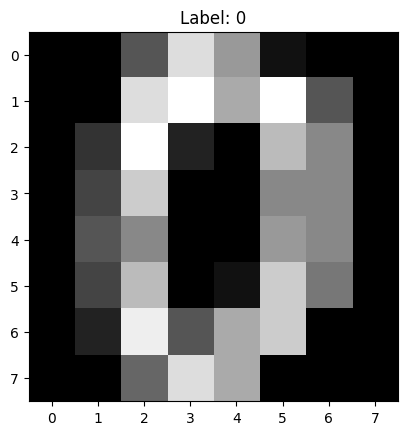

In [284]:
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.show()

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=56, stratify=y)

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1437, 64)
y_train.shape: (1437,)
X_test.shape: (360, 64)
y_test.shape: (360,)


accuracy score for train: 0.9958246346555324
accuracy score for test: 0.9916666666666667


Text(0.5, 23.52222222222222, 'predicted label')

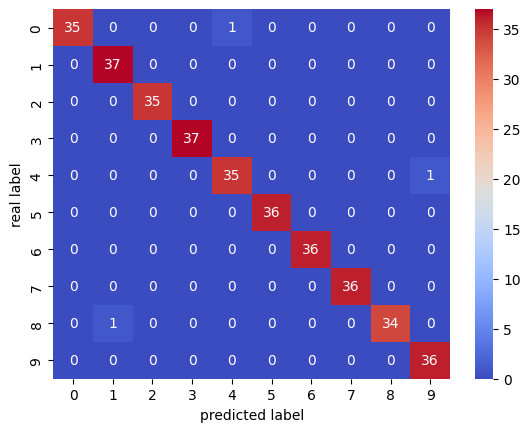

In [286]:
model_1 = SVC(kernel="rbf")
model_1.fit(X_train, y_train)
t_pred_train = model_1.predict(X_train)
t_pred_test = model_1.predict(X_test)

train_acc = accuracy_score(y_train, t_pred_train)
test_acc = accuracy_score(y_test, t_pred_test)

print(f"accuracy score for train: {train_acc}")
print(f"accuracy score for test: {test_acc}")

c_matrix = confusion_matrix(y_test, t_pred_test)
sns.heatmap(c_matrix, annot=True, cmap="coolwarm")
plt.ylabel("real label")
plt.xlabel("predicted label")

3 samples misclassified


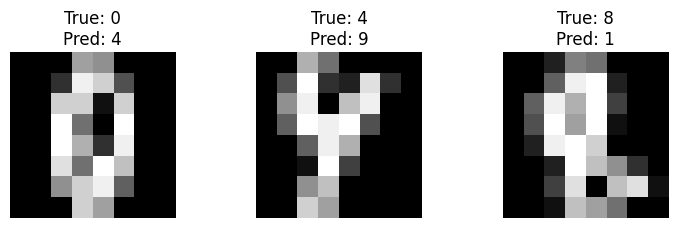

In [287]:
wrong_idx = [i for i, (yp, yt) in enumerate(zip(t_pred_test, y_test)) if yp != yt]

print(f"{len(wrong_idx)} samples misclassified")

plt.figure(figsize=(10, 6))
for idx, wrong in enumerate(wrong_idx[:12]):
    plt.subplot(3, 4, idx + 1)
    plt.imshow(X_test[wrong].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[wrong]}\nPred: {t_pred_test[wrong]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [288]:
import torch
import torch.nn as nn

In [289]:
# NeuralNet
class numberNN(nn.Module):
    def __init__(self, input):
        super().__init__()
        self.fc1 = nn.Linear(input, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.fc3(x)

        return x

model = numberNN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [290]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [291]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [292]:
train_loader

In [293]:
def model_training(epochs=10):
    print("The metric is f1_score")
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        
        model.eval()
        all_train_preds, all_train_labels = [], []
        all_test_preds, all_test_labels = [], []
        
        with torch.no_grad():
            for X_batch, y_batch in train_loader:
                preds = torch.argmax(model(X_batch), dim=1)
                all_train_preds.extend(preds.numpy())
                all_train_labels.extend(y_batch.numpy())
                
            for X_batch, y_batch in test_loader:
                preds = torch.argmax(model(X_batch), dim=1)
                all_test_preds.extend(preds.numpy())
                all_test_labels.extend(y_batch.numpy())
        
        f1_train = f1_score(all_train_labels, all_train_preds, average="macro")
        f1_val = f1_score(all_test_labels, all_test_preds, average="macro")
        
        print(f"epoch: {epoch+1},  Loss: {avg_loss:.4f},  Train: {f1_train:.4f},  Test: {f1_val:.4f}")

    wrong_idx = [i for i, (yp, yt) in enumerate(zip(all_test_labels, all_test_preds)) if yp != yt]

    print(f"{len(wrong_idx)} samples misclassified")

    plt.figure(figsize=(10, 6))
    for idx, wrong in enumerate(wrong_idx[:12]):
        plt.subplot(3, 4, idx + 1)
        plt.imshow(X_test[wrong].reshape(8, 8), cmap='gray')
        plt.title(f"True: {y_test[wrong]}\nPred: {all_test_preds[wrong]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

The metric is f1_score
epoch: 1,  Loss: 2.2166,  Train: 0.3671,  Test: 0.3772
epoch: 2,  Loss: 1.9228,  Train: 0.5997,  Test: 0.5750
epoch: 3,  Loss: 1.5029,  Train: 0.7312,  Test: 0.7166
epoch: 4,  Loss: 1.1180,  Train: 0.7718,  Test: 0.7644
epoch: 5,  Loss: 0.8531,  Train: 0.8371,  Test: 0.8153
epoch: 6,  Loss: 0.7058,  Train: 0.8887,  Test: 0.8668
epoch: 7,  Loss: 0.6230,  Train: 0.9166,  Test: 0.9090
epoch: 8,  Loss: 0.5583,  Train: 0.9424,  Test: 0.9356
epoch: 9,  Loss: 0.4754,  Train: 0.9528,  Test: 0.9410
epoch: 10,  Loss: 0.4294,  Train: 0.9585,  Test: 0.9498
epoch: 11,  Loss: 0.3894,  Train: 0.9635,  Test: 0.9468
epoch: 12,  Loss: 0.3699,  Train: 0.9699,  Test: 0.9470
epoch: 13,  Loss: 0.3486,  Train: 0.9749,  Test: 0.9466
epoch: 14,  Loss: 0.3295,  Train: 0.9762,  Test: 0.9467
epoch: 15,  Loss: 0.3153,  Train: 0.9755,  Test: 0.9494
epoch: 16,  Loss: 0.2871,  Train: 0.9783,  Test: 0.9496
epoch: 17,  Loss: 0.2611,  Train: 0.9804,  Test: 0.9495
epoch: 18,  Loss: 0.2482,  Train: 

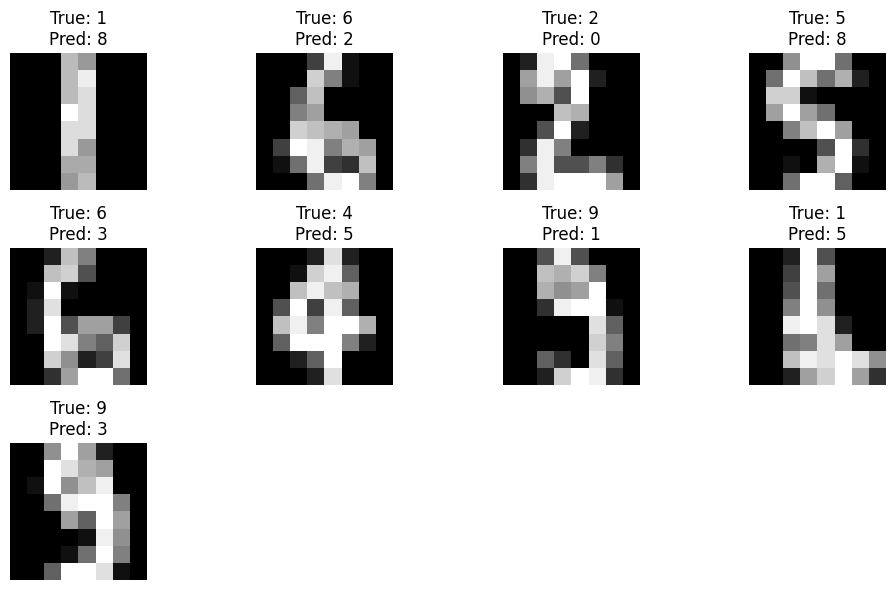

In [294]:
model_training(80)

(64,)
[ 0  1  4  5  5  5  4  4  6 15 15 14 14 14 15 15  1  3  1  0  0 10 15 15
  0  0  0  1 12 15 12  2  0  0  0 11 15 12  0  0  0  0  8 15 15  2  0  0
  0  0 12 14  4  0  0  0  0  0  0  1  0  0  0  0]
SVM model prediction: 7
neural net prediction: 7


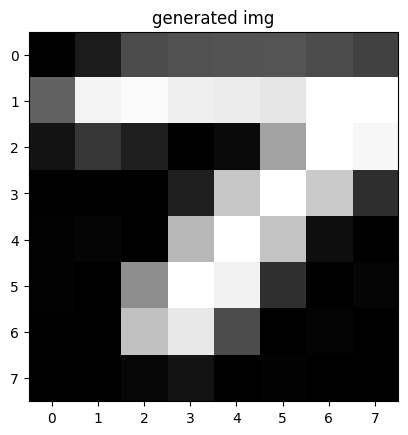

In [295]:
import joblib
from PIL import Image

def image_to_array(image_path):
    img = Image.open(image_path).convert("L")
    img = img.resize((8,8), Image.Resampling.LANCZOS)
    arr = np.array(img)
    arr = (arr/16).astype(int)
    arr = arr.flatten()
    return arr

def image_load(image_path):
    img = Image.open(image_path).convert("L")
    img = img.resize((8,8), Image.Resampling.LANCZOS)
    arr = np.array(img)
    return arr


pixels = image_to_array("num.png")
img = image_load("num.png")
print(pixels.shape)
print(pixels)

print(f"SVM model prediction: {model_1.predict([pixels])[0]}")
print(f"neural net prediction: {torch.argmax(model(torch.tensor(pixels,  dtype=torch.float32)))}")


plt.imshow(img, cmap='gray')
plt.title(f"generated img")
plt.show()